In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/content/Employee.csv')
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [6]:
data.shape

(74498, 24)

In [7]:
data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

In [9]:
data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [10]:
original_data = data.copy()

In [11]:
data.nunique()

Employee ID                 74498
Age                            42
Gender                          2
Years at Company               51
Job Role                        5
Monthly Income               9842
Work-Life Balance               4
Job Satisfaction                4
Performance Rating              4
Number of Promotions            5
Overtime                        2
Distance from Home             99
Education Level                 5
Marital Status                  3
Number of Dependents            7
Job Level                       3
Company Size                    3
Company Tenure                127
Remote Work                     2
Leadership Opportunities        2
Innovation Opportunities        2
Company Reputation              4
Employee Recognition            4
Attrition                       2
dtype: int64

Employee ID is unique value. So we can drop this column.

In [12]:
data.drop('Employee ID' ,axis=1,inplace=True)
data.columns

Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [13]:
data['Attrition'].value_counts()

Attrition
Stayed    39128
Left      35370
Name: count, dtype: int64

We know that 'Attrition' column is the Target column . It has only two values,Stayed and Left.



EDA

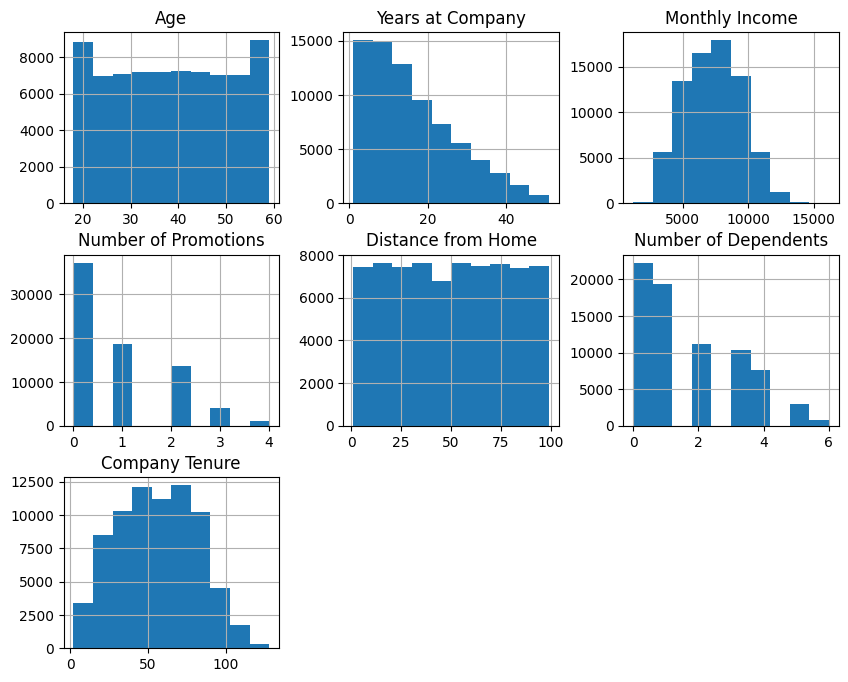

In [14]:
#Distribution of data
freqgraph = data.select_dtypes(include=['float64','int64'])
freqgraph.hist(figsize=(10, 8))
plt.show()

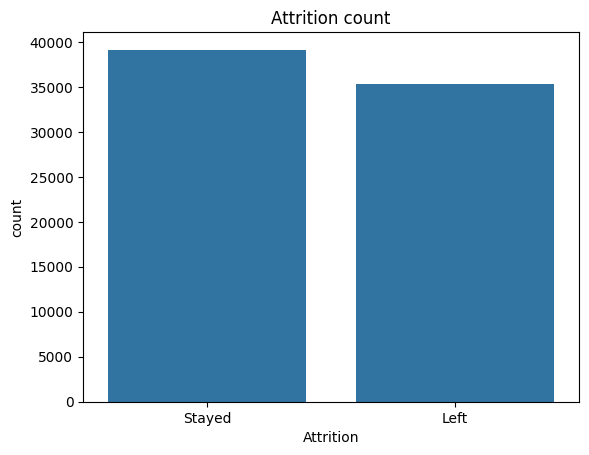

In [15]:
sns.countplot(x=data["Attrition"],data = data)
plt.title("Attrition count")
plt.show()


Inference:
Stayed count is greater than left.

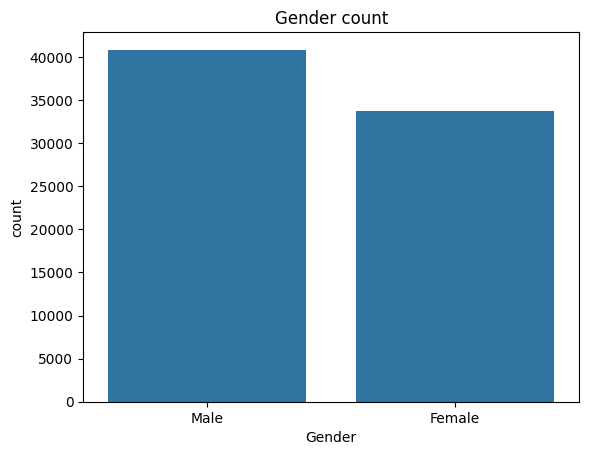

In [16]:
sns.countplot(x=data["Gender"],data = data)
plt.title("Gender count")
plt.show()


Inference:
Males are dominated in company.

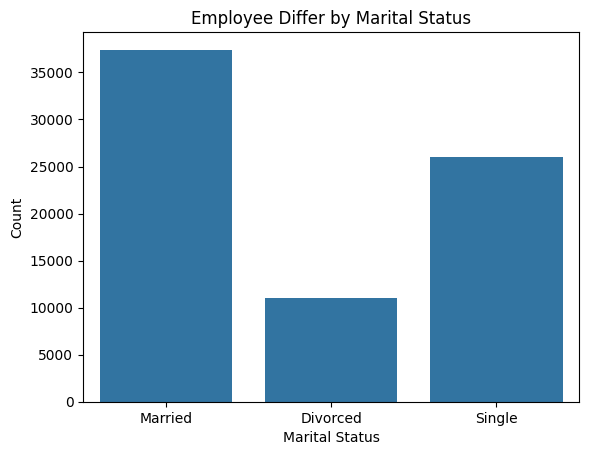

In [17]:
#Number employee differ by marital status
sns.countplot(x='Marital Status', data=data)
plt.title('Employee Differ by Marital Status')
plt.ylabel('Count')
plt.show()

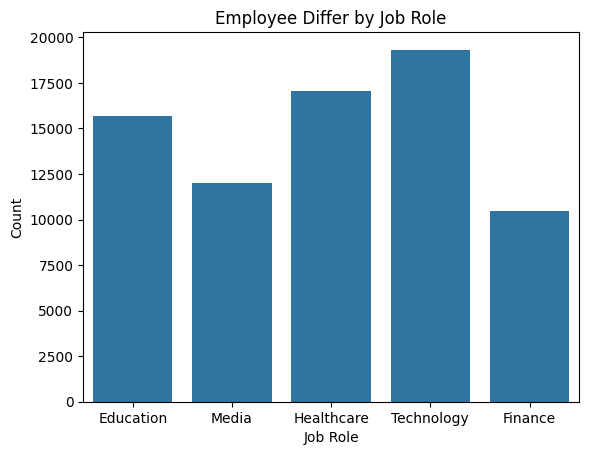

In [18]:
#Number employee differ by department
sns.countplot(x='Job Role', data=data)
plt.title('Employee Differ by Job Role')
plt.ylabel('Count')
plt.show()

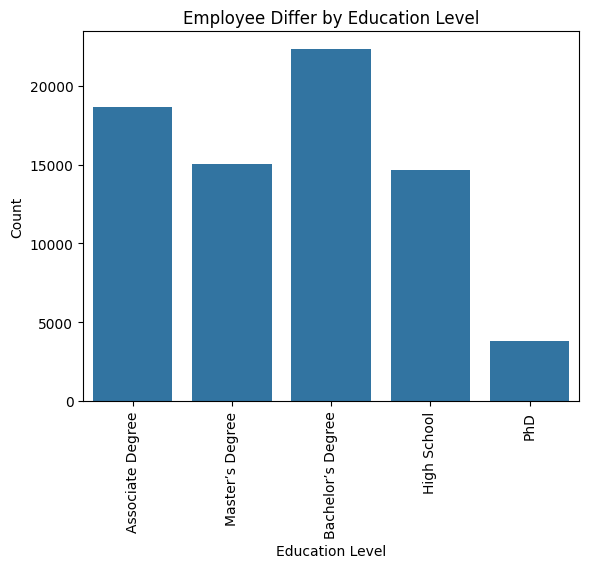

In [19]:
#Number employee differ by education level
sns.countplot(x='Education Level', data=data)
plt.title('Employee Differ by Education Level')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()



Bi-variate Analysys

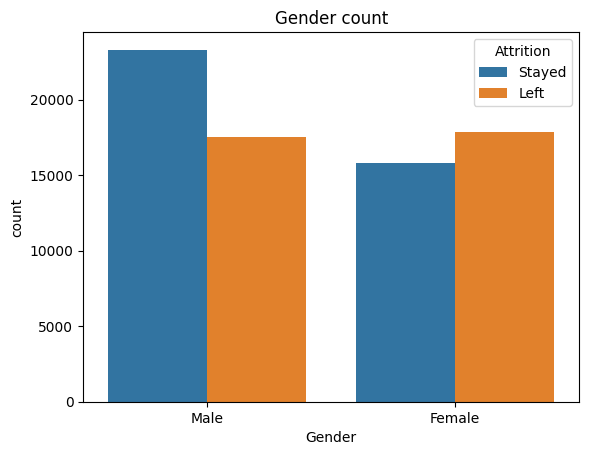

In [20]:
sns.countplot(x=data["Gender"],hue=data['Attrition'],data = data)
plt.title("Gender count")
plt.show()

Inference:
Count of Males greater than female.Stayed rate of males greater than females.Left count is almost same, but when comparing percentage females left more than males.

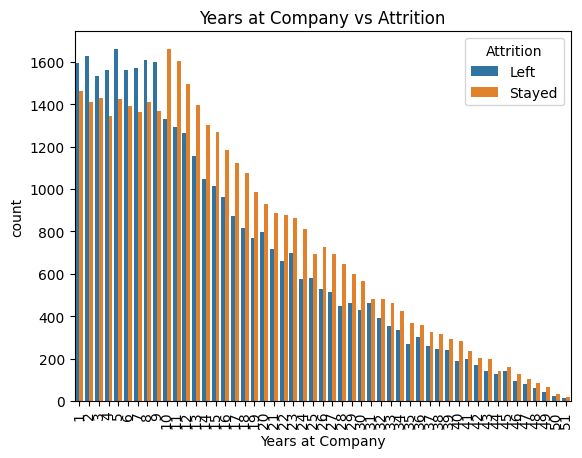

In [21]:
sns.countplot(x=data["Years at Company"],hue = data["Attrition"],data = data)
plt.title("Years at Company vs Attrition")
plt.xticks(rotation=90)
plt.show()


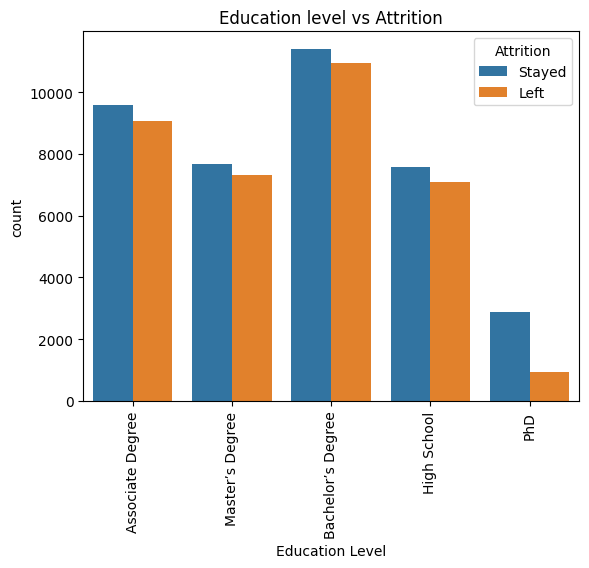

In [22]:
sns.countplot(x=data["Education Level"],hue = data["Attrition"],data = data)
plt.title("Education level vs Attrition")
plt.xticks(rotation=90)
plt.show()


Inference:
Count of stayed and left are greater for Education level Bachelor's degree.

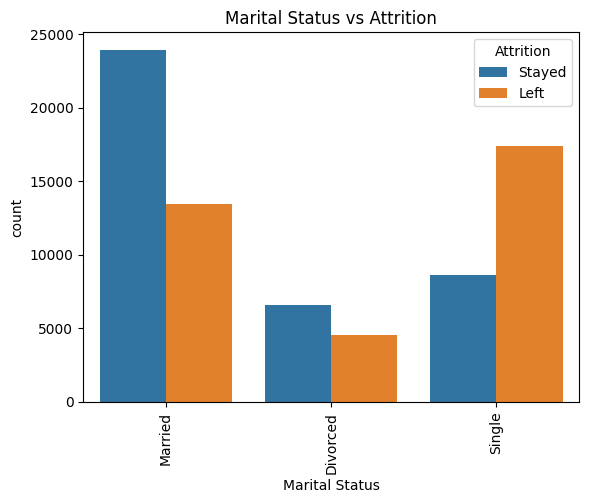

In [23]:
sns.countplot(x=data["Marital Status"],hue = data["Attrition"],data = data)
plt.title("Marital Status vs Attrition")
plt.xticks(rotation=90)
plt.show()


Inference:
Most of the employees stayed are married. Left count of employees higher for single status.

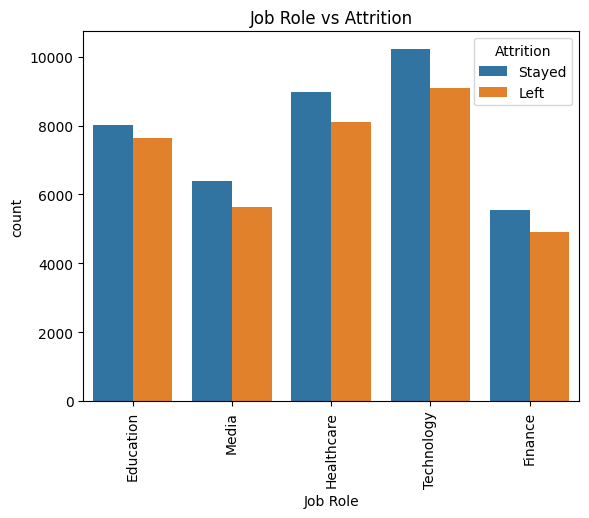

In [24]:
sns.countplot(x=data["Job Role"],hue = data["Attrition"],data = data)
plt.title("Job Role vs Attrition")
plt.xticks(rotation=90)
plt.show()


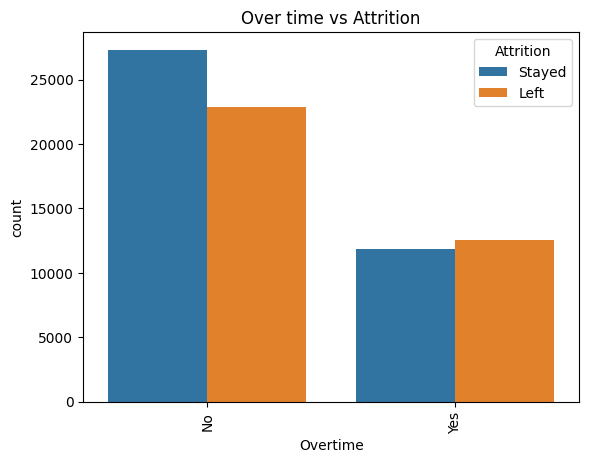

In [25]:
sns.countplot(x=data["Overtime"],hue = data["Attrition"],data = data)
plt.title("Over time vs Attrition")
plt.xticks(rotation=90)
plt.show()


<Axes: >

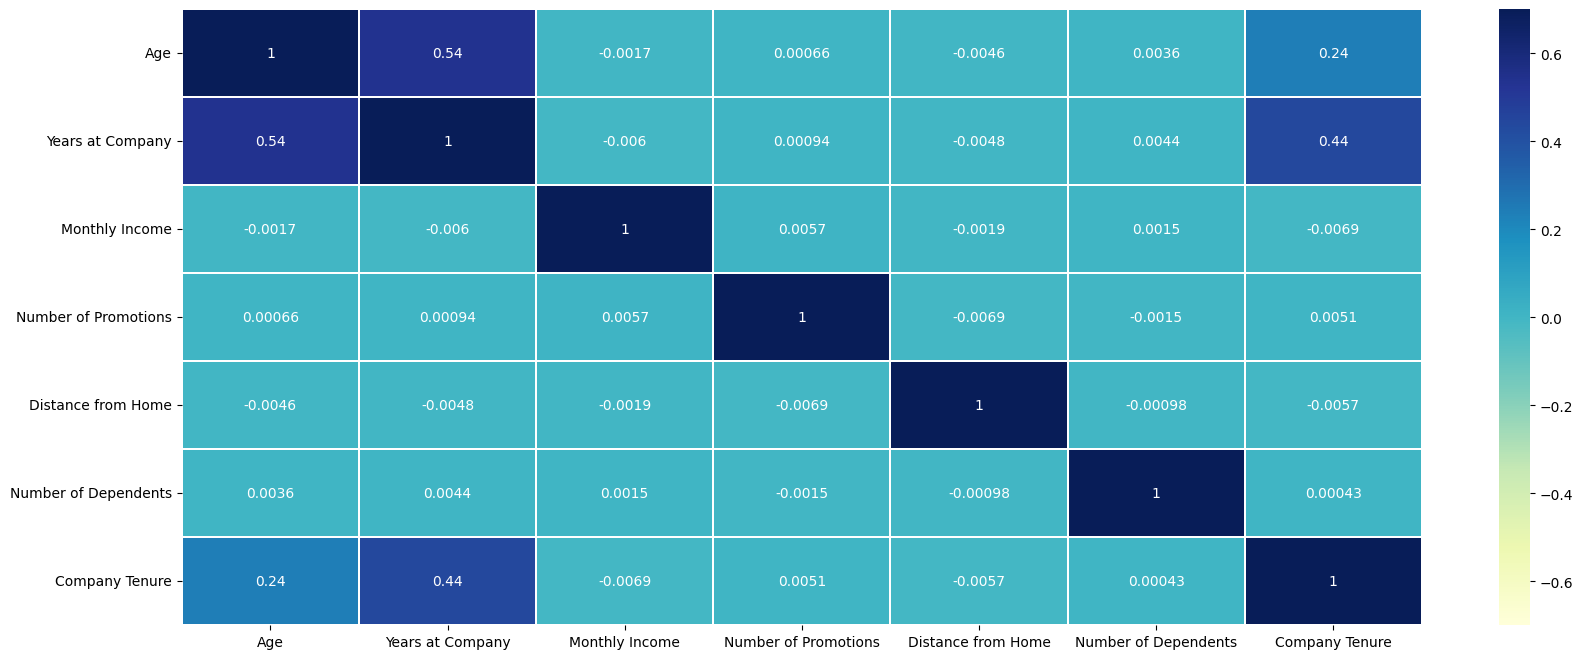

In [26]:
#Plot correlation map
corrmatrix= data.corr(numeric_only=True)
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.7,vmax=0.7,annot=True,linewidths=0.2,cmap='YlGnBu')

Handling Missing values

In [27]:
data.isna().sum()

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

In [28]:
print(data['Work-Life Balance'].mode()[0])

Good


In [29]:
data['Work-Life Balance'].fillna(data['Work-Life Balance'].mode()[0], inplace=True)#It is categorical column
data['Performance Rating'].fillna(data['Performance Rating'].mode()[0], inplace=True)#It is categorical column

data['Number of Promotions'].fillna(data['Number of Promotions'].median(), inplace=True)#It is numerical column
data['Education Level'].fillna(data['Education Level'].mode()[0], inplace=True)#It is categorical column
data['Marital Status'].fillna(data['Marital Status'].mode()[0], inplace=True)#It is categorical column
data['Number of Dependents'].fillna(data['Number of Dependents'].median(), inplace=True)#It is categorical column
data['Job Level'].fillna(data['Job Level'].mode()[0], inplace=True)#It is categorical column
data['Company Size'].fillna(data['Company Size'].mode()[0], inplace=True)#It is categorical column
data['Remote Work'].fillna(data['Remote Work'].mode()[0], inplace=True)#It is categorical column
data['Employee Recognition'].fillna(data['Employee Recognition'].mode()[0], inplace=True)#It is categorical column


In [30]:
data.isna().sum()

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

Detect and handle outliers

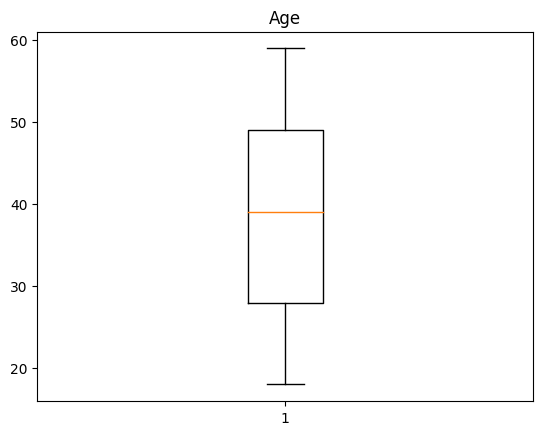

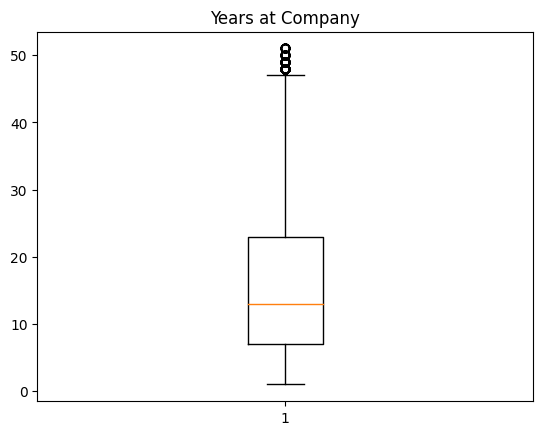

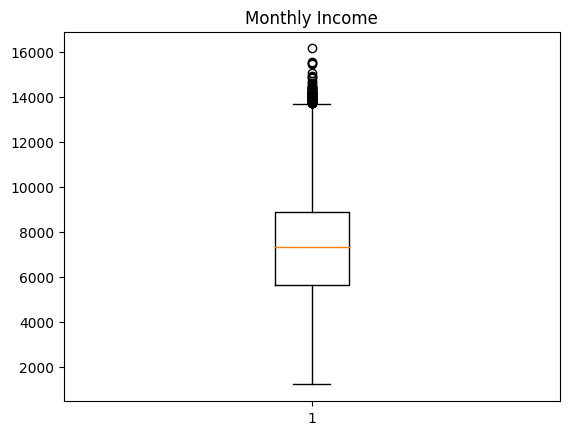

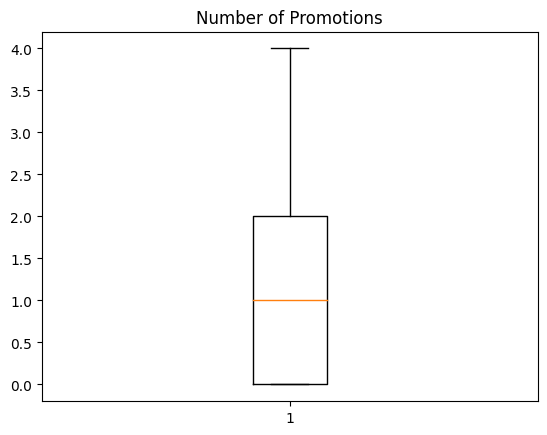

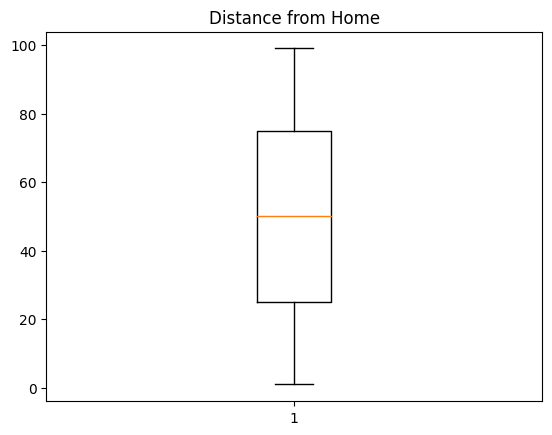

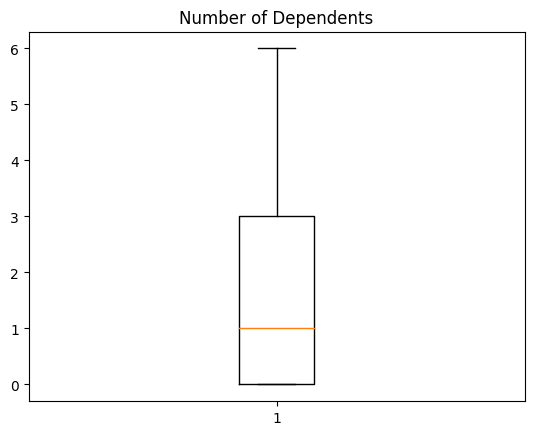

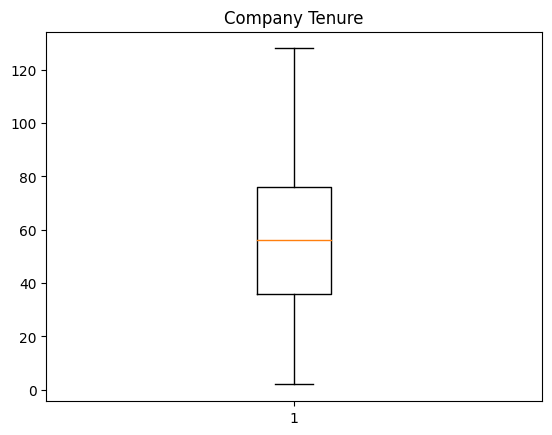

In [31]:
num_columns=data.select_dtypes(include=['float64','int64'])
for i in num_columns:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)


Year at company and Monthly income shows outliers ,but we cannot remove that beacause we cannot say that outlier for monthly income and years at company, it may be genuine. So we decided to move with outliers.

**Encoding**


In [32]:
#change Attrition values to 0 and 1 for easy computing
data['Attrition']=data['Attrition'].apply(lambda x : 1 if x=='Stayed' else 0)
data.head(6)

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,No,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,1
1,59,Female,4,Media,5534,Poor,High,Low,3.0,No,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,1
2,24,Female,10,Healthcare,8159,Good,High,Low,0.0,No,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,1
3,36,Female,7,Education,3989,Good,High,High,1.0,No,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,1
4,56,Male,41,Education,4821,Fair,Very High,Average,0.0,Yes,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,1
5,38,Female,3,Technology,9977,Fair,High,Below Average,3.0,No,...,0.0,Mid,Medium,47,No,No,Yes,Fair,High,0


In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Encode categorical features
cat_cols = data.select_dtypes(include=["object"]).columns.tolist()
print(cat_cols)

for col in cat_cols:
  data[col] = le.fit_transform(data[col])

#data.head()

['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']


PCA

In [34]:
from sklearn.decomposition import PCA

In [35]:
data_pca = data.drop(columns = ['Attrition'],axis=1)

In [40]:
#Do scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_pca = scaler.fit_transform(data_pca)


In [37]:
data_pca.columns

Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition'],
      dtype='object')

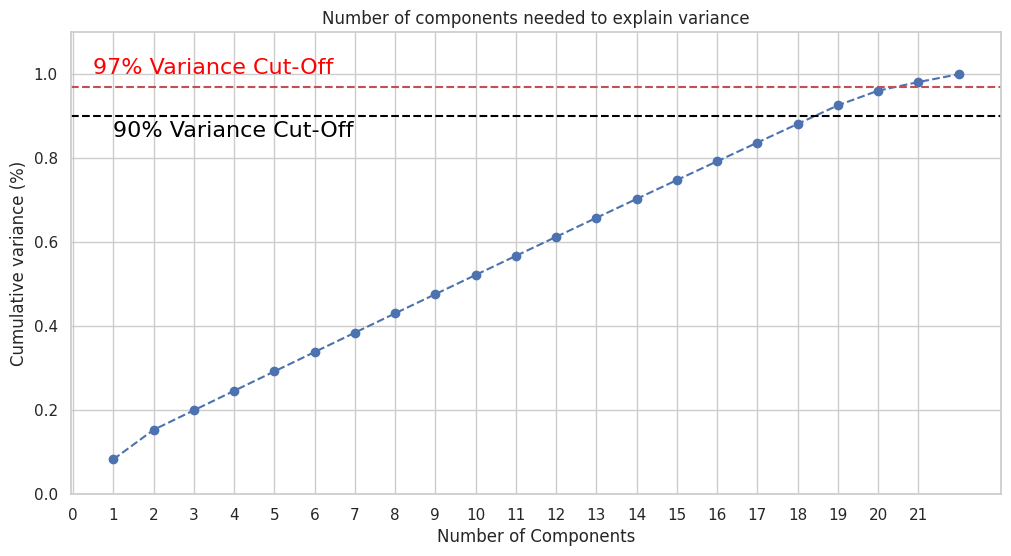

In [47]:
pca = PCA().fit(data_pca)

sns.set(style = 'whitegrid')
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 23, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 22, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Number of components needed to explain variance')

plt.axhline(y=0.97, color='r', linestyle='--')
plt.axhline(y=0.9, color='black', linestyle='--')
plt.text(0.5, 1, '97% Variance Cut-Off', color = 'red', fontsize=16)
plt.text(1, 0.85, '90% Variance Cut-Off', color = 'black', fontsize=16)
plt.show()

Using pca we  find no of components 21 . so we are going with original data.

Let’s split the data into the target and feature variables.


In [55]:
#x = data.drop(columns = ['Attrition'],axis=1)
#y = data['Attrition']


In [50]:
pca = PCA(n_components = 22)
x = pca.fit_transform(data_pca)

Split data into train and test

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=.25)

ValueError: Found input variables with inconsistent numbers of samples: [74498, 22]

In [57]:
#Do scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)


In [58]:
#Evaluation metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

#Logistic Regression Model


In [61]:
#Logistic Regression Model
#Just making logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='saga', max_iter=1000)


In [62]:
log_model = log_reg.fit(x_train,y_train)
y_log_pred = log_model.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [63]:
log_acc = accuracy_score(y_test,y_log_pred)
log_acc

0.5908724832214766

*2*.Decision tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred = dt_clf.predict(x_test)


In [65]:
print("Accuracy: ",accuracy_score(y_test,y_pred))


Accuracy:  0.6664697986577182


*3*.Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1 =RandomForestClassifier(n_estimators=25,max_depth=25,criterion='gini')
rf_clf1.fit(x_train,y_train)

RandomForestClassifier(max_depth=25, n_estimators=25)

In [67]:
y_pred_random = rf_clf1.predict(x_test)
print('Accuracy is',accuracy_score(y_test,y_pred_random))

Accuracy is 0.7363221476510067


4.KNN model

In [68]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

In [69]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred_knn = classifier.predict(x_test)
  accuracy= accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

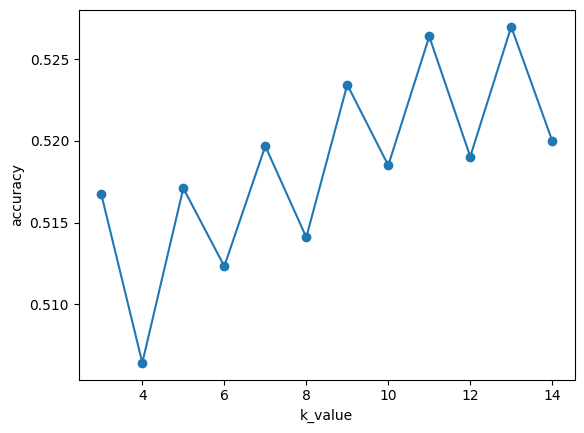

In [70]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k_value')
plt.ylabel('accuracy')

In [71]:
classifier = KNeighborsClassifier(n_neighbors=13,metric='minkowski',p=2) #13 is the highest data point
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)


In [72]:
print("Accuracy: ",accuracy_score(y_test,y_pred_knn))
print("Precision: ",precision_score(y_test,y_pred_knn,average='micro'))
print("Recall: ",recall_score(y_test,y_pred_knn,average='micro'))
print("f1 score: ",f1_score(y_test,y_pred_knn,average='micro'))

Accuracy:  0.5269798657718121
Precision:  0.5269798657718121
Recall:  0.5269798657718121
f1 score:  0.5269798657718121


SVM

In [1]:
from sklearn.svm import SVC
sv_cl = SVC(kernel='linear')#kernel linear get maximum accuracy
sv_cl.fit(x_train,y_train)
y_pred_svm = sv_cl.predict(x_test)
svm_acc = accuracy_score(y_test,y_pred_svm)
print("Accuracy: ",accuracy_score(y_test,y_pred_svm))

NameError: name 'x_train' is not defined

Cross validation

In [73]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [74]:
kfold_validator=KFold(10) #no of folds
cv_score=cross_val_score(log_reg,x,y,cv=kfold_validator)
print(cv_score)
cv_score.mean()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
#stratified cv
from sklearn.model_selection import StratifiedKFold
stratified_cv =StratifiedKFold(n_splits=10)
cv_score_sr=cross_val_score(log_reg,x,y,cv=stratified_cv)
cv_score


In [ ]:
cv_score.mean()